In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns

In [48]:
data = pd.read_csv(r"C:\Users\umamaheshwari\Downloads\Iris.csv")
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [49]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
data.shape

(150, 6)

In [51]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [52]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [53]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [55]:
data.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

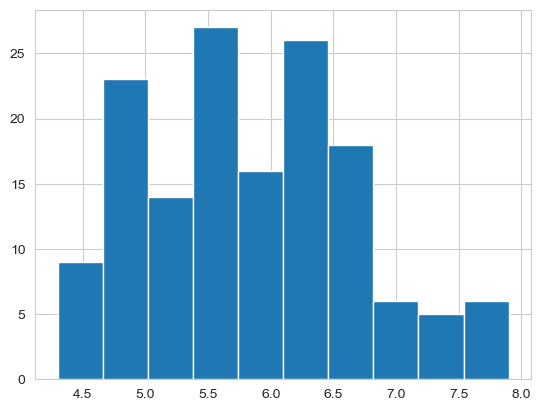

In [56]:
data['SepalLengthCm'].hist()

In [57]:
colors = ['blue','orange','green']
Species = ['Iris-setosa', 
'Iris-versicolor',
'Iris-virginica'  ]

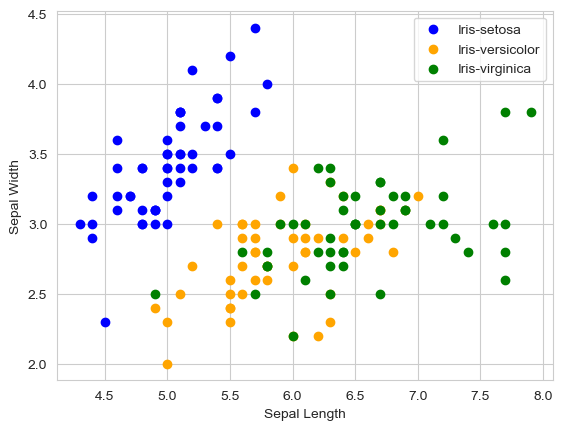

In [58]:
for i in range(3):
    x = data[data['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c = colors[i],label=Species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

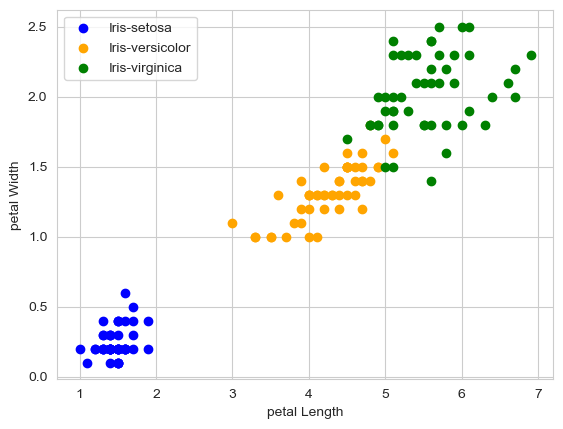

In [59]:
for i in range(3):
    x = data[data['Species']==Species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c = colors[i],label=Species[i])
    plt.xlabel("petal Length")
    plt.ylabel("petal Width")
    plt.legend()

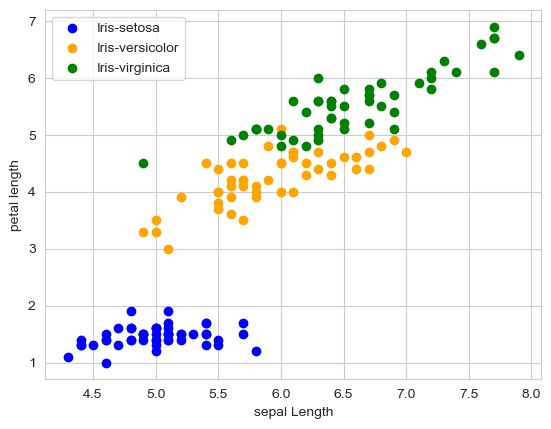

In [60]:
for i in range(3): #in three species
    x = data[data['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c = colors[i],label=Species[i])
    plt.xlabel("sepal Length")
    plt.ylabel("petal length")
    plt.legend()

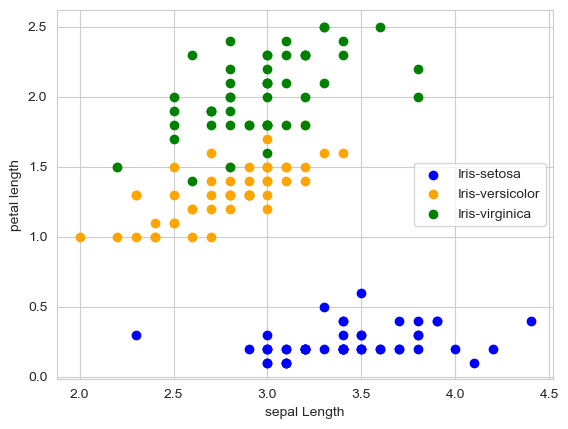

In [61]:
for i in range(3): #in three species
    x = data[data['Species']==Species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c = colors[i],label=Species[i])
    plt.xlabel("sepal Length")
    plt.ylabel("petal length")
    plt.legend()

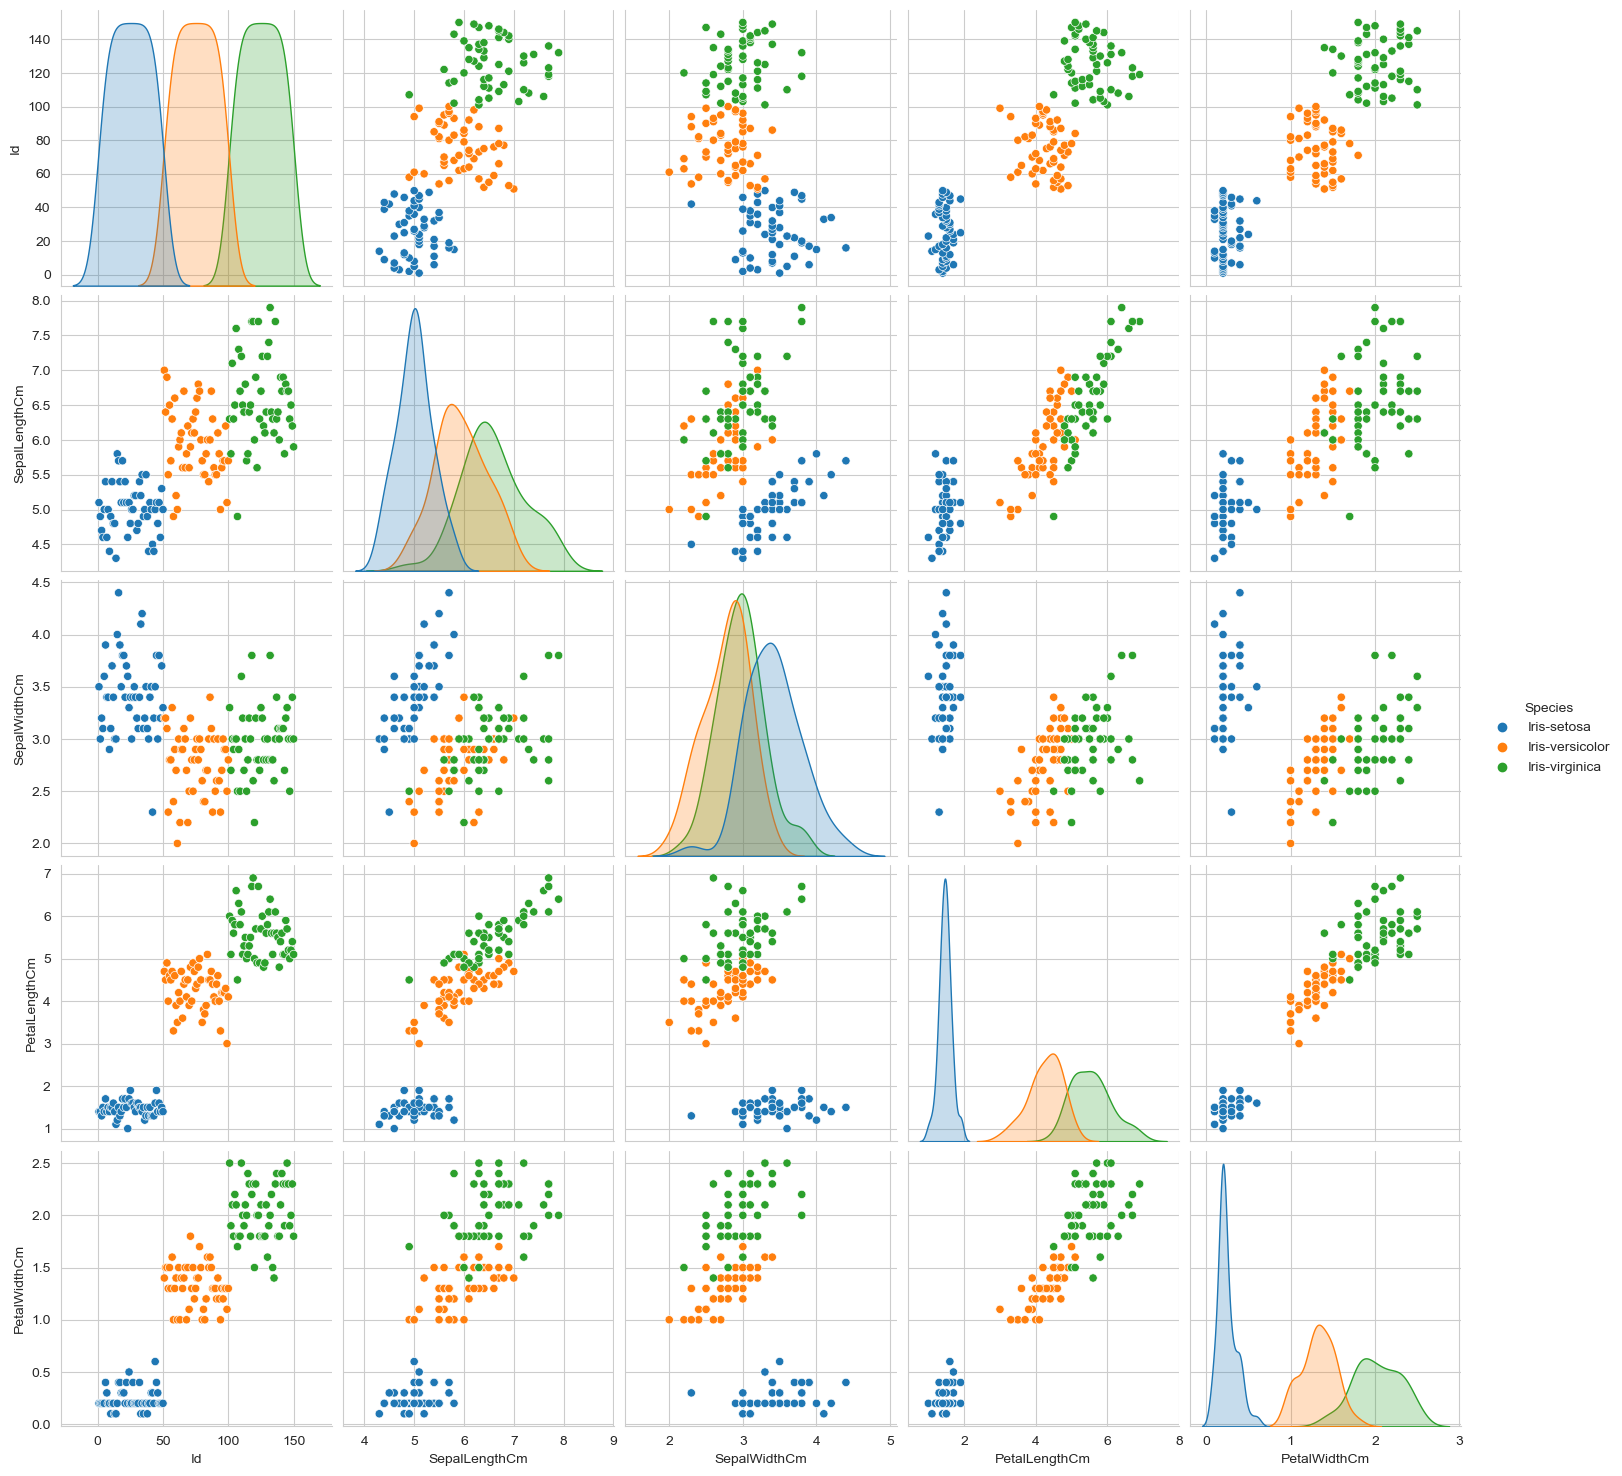

In [65]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data, hue = 'Species',height = 3);
plt.show()

In [67]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

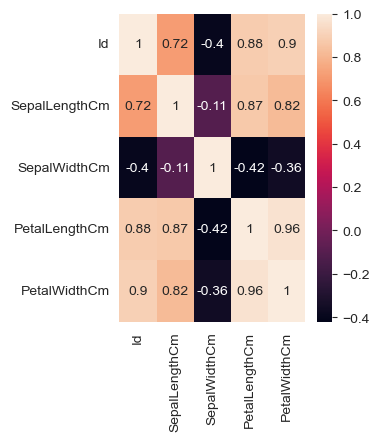

In [69]:
corr = data.corr()
fig, ax = plt.subplots(figsize = (3,4))
sns.heatmap(corr,annot = True,ax = ax)

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [72]:
data['Species'] = le.fit_transform(df['Species'])
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [94]:
from sklearn.model_selection import train_test_split
x = data.drop(columns = ['Species'])
y = data['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)

In [95]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [101]:
print("Accuracy",model.score(x_test,y_test)*100)


Accuracy 100.0


In [103]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [105]:
model.fit(x_train, y_train)


KNeighborsClassifier()

In [116]:
print("Accuracy",model.score(x_test,y_test)*100)

Accuracy 100.0


In [117]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [114]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [115]:
print("Accuracy",model.score(x_test,y_test)*100)

Accuracy 100.0
